In [1]:
## CSCI 4150U - Data Mining - Lab 7
# Name: Thinh Le
# Student ID: 100741899
# Dataset: wdbc.data

In [2]:
import sys
import pandas as pd
import numpy as np
from sklearn import cluster
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
headers = ['ID', 'Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 
            'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 
            'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30']
data = pd.read_csv('./data1/wdbc.data', header=None, index_col=None, names=headers)
data.drop(columns=['ID', 'Class'], inplace=True)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0, 0.5, 'SSE')

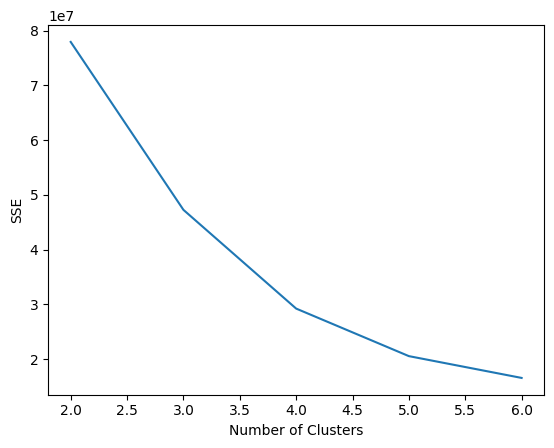

In [4]:
numClusters = [2, 3, 4, 5, 6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [5]:
# According to the graph, we can conclude that the best k for this dataset is k=4, using the elbow approach.

In [6]:
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(data)
centroids = k_means.cluster_centers_

df_centroids = pd.DataFrame(centroids, columns=data.columns)
df_centroids

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,11.374660,18.033806,72.998358,401.888806,0.094141,0.079988,0.044943,0.023512,0.177566,0.064409,...,12.530034,23.787201,81.281007,484.963433,0.128405,0.182592,0.163310,0.069423,0.276479,0.081475
1,18.978317,21.618020,125.336634,1124.306931,0.100715,0.144660,0.168814,0.096682,0.191992,0.060649,...,22.941584,28.682673,152.752475,1617.970297,0.139230,0.346506,0.438068,0.187061,0.311611,0.086185
2,14.522541,19.485359,94.701768,654.760773,0.096399,0.110807,0.093317,0.050865,0.179946,0.061994,...,16.648177,26.313867,110.286851,856.992265,0.133449,0.294730,0.316295,0.129224,0.298214,0.086572
3,23.401579,22.762105,156.147368,1729.421053,0.104154,0.171922,0.239016,0.134858,0.185884,0.059145,...,29.931579,30.295263,203.073684,2765.842105,0.141511,0.389416,0.505995,0.227526,0.289853,0.081874


In [7]:
data['Cluster ID'] = k_means.labels_
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,Cluster ID
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,2
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [8]:
def closest_points(data, df_centroid):
    df_points = data.drop(columns=['Cluster ID'])
    points = df_points.to_numpy()
    centroid = df_centroid.to_numpy()
    
    dists = []
    for point in points:
        dists.append(np.linalg.norm(point - centroid[0]))

    closest_indexes = []
    for i in range(5):
        index = np.where(dists == np.min(dists))[0][0]
        dists[index] = sys.maxsize
        closest_indexes.append(index)
        
    df_closest = data.iloc[closest_indexes]
    return df_closest

In [9]:
data_c0 = data[data['Cluster ID'] == 0]
df_c0 = df_centroids.loc[[0]]
closest_points(data_c0, df_c0)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,Cluster ID
304,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,...,21.61,82.69,489.8,0.1144,0.1789,0.12260,0.05509,0.2208,0.07638,0
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.1582,0.18040,0.09608,0.2664,0.07809,0
348,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,...,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763,0
515,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,23.03,79.15,478.6,0.1483,0.1574,0.16240,0.08542,0.3060,0.06783,0
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,19.67,81.93,475.7,0.1415,0.2170,0.23020,0.11050,0.2787,0.07427,0


In [10]:
data_c1 = data[data['Cluster ID'] == 1]
df_c1 = df_centroids.loc[[1]]
closest_points(data_c1, df_c1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,Cluster ID
433,18.82,21.97,123.7,1110.0,0.10180,0.1389,0.1594,0.08744,0.1943,0.06132,...,30.93,145.3,1603.0,0.1390,0.3463,0.3912,0.1708,0.3007,0.08314,1
282,19.40,18.18,127.2,1145.0,0.10370,0.1442,0.1626,0.09464,0.1893,0.05892,...,28.65,152.4,1628.0,0.1518,0.3749,0.4316,0.2252,0.3590,0.07787,1
85,18.46,18.52,121.1,1075.0,0.09874,0.1053,0.1335,0.08795,0.2132,0.06022,...,27.68,152.2,1603.0,0.1398,0.2089,0.3157,0.1642,0.3695,0.08579,1
42,19.07,24.81,128.3,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,0.06343,...,33.17,177.4,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380,1
87,19.02,24.59,122.0,1076.0,0.09029,0.1206,0.1468,0.08271,0.1953,0.05629,...,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.1956,0.3956,0.09288,1


In [11]:
data_c2 = data[data['Cluster ID'] == 2]
df_c2 = df_centroids.loc[[2]]
closest_points(data_c2, df_c2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,Cluster ID
513,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,17.24,108.5,862.0,0.1223,0.19280,0.24920,0.09186,0.2626,0.07048,2
340,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,...,21.51,111.4,862.1,0.1294,0.33710,0.37550,0.14140,0.3053,0.08764,2
311,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,21.75,103.7,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,2
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,28.39,108.1,830.5,0.1089,0.26490,0.37790,0.09594,0.2471,0.07463,2
225,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,0.05448,...,16.90,110.4,873.2,0.1297,0.15250,0.16320,0.10870,0.3062,0.06072,2


In [12]:
data_c3 = data[data['Cluster ID'] == 3]
df_c3 = df_centroids.loc[[2]]
closest_points(data_c3, df_c3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,Cluster ID
369,22.01,21.90,147.2,1482.0,0.10630,0.1954,0.2448,0.15010,0.1824,0.06140,...,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574,3
122,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,3
18,19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,3
219,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,0.1428,0.05313,...,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568,3
108,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,3


In [13]:
X = data.drop(['Cluster ID'], axis=1)
X_sample = X.head(100)

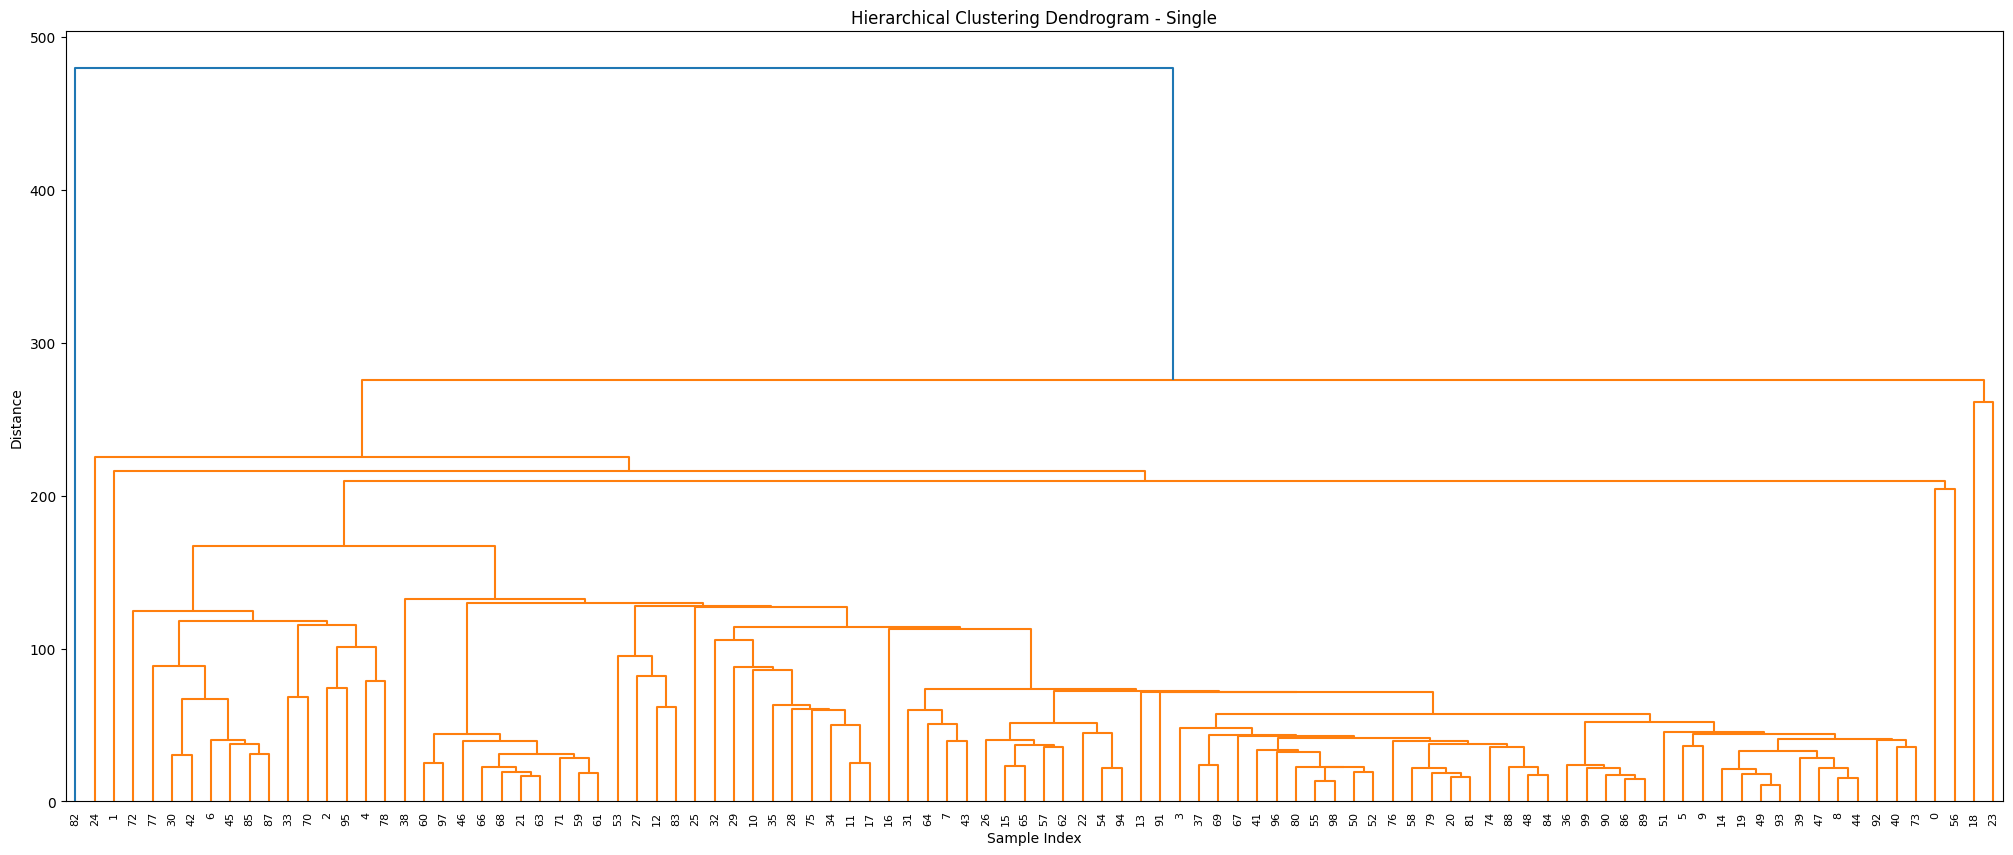

In [14]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Single')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z, leaf_font_size=8.)

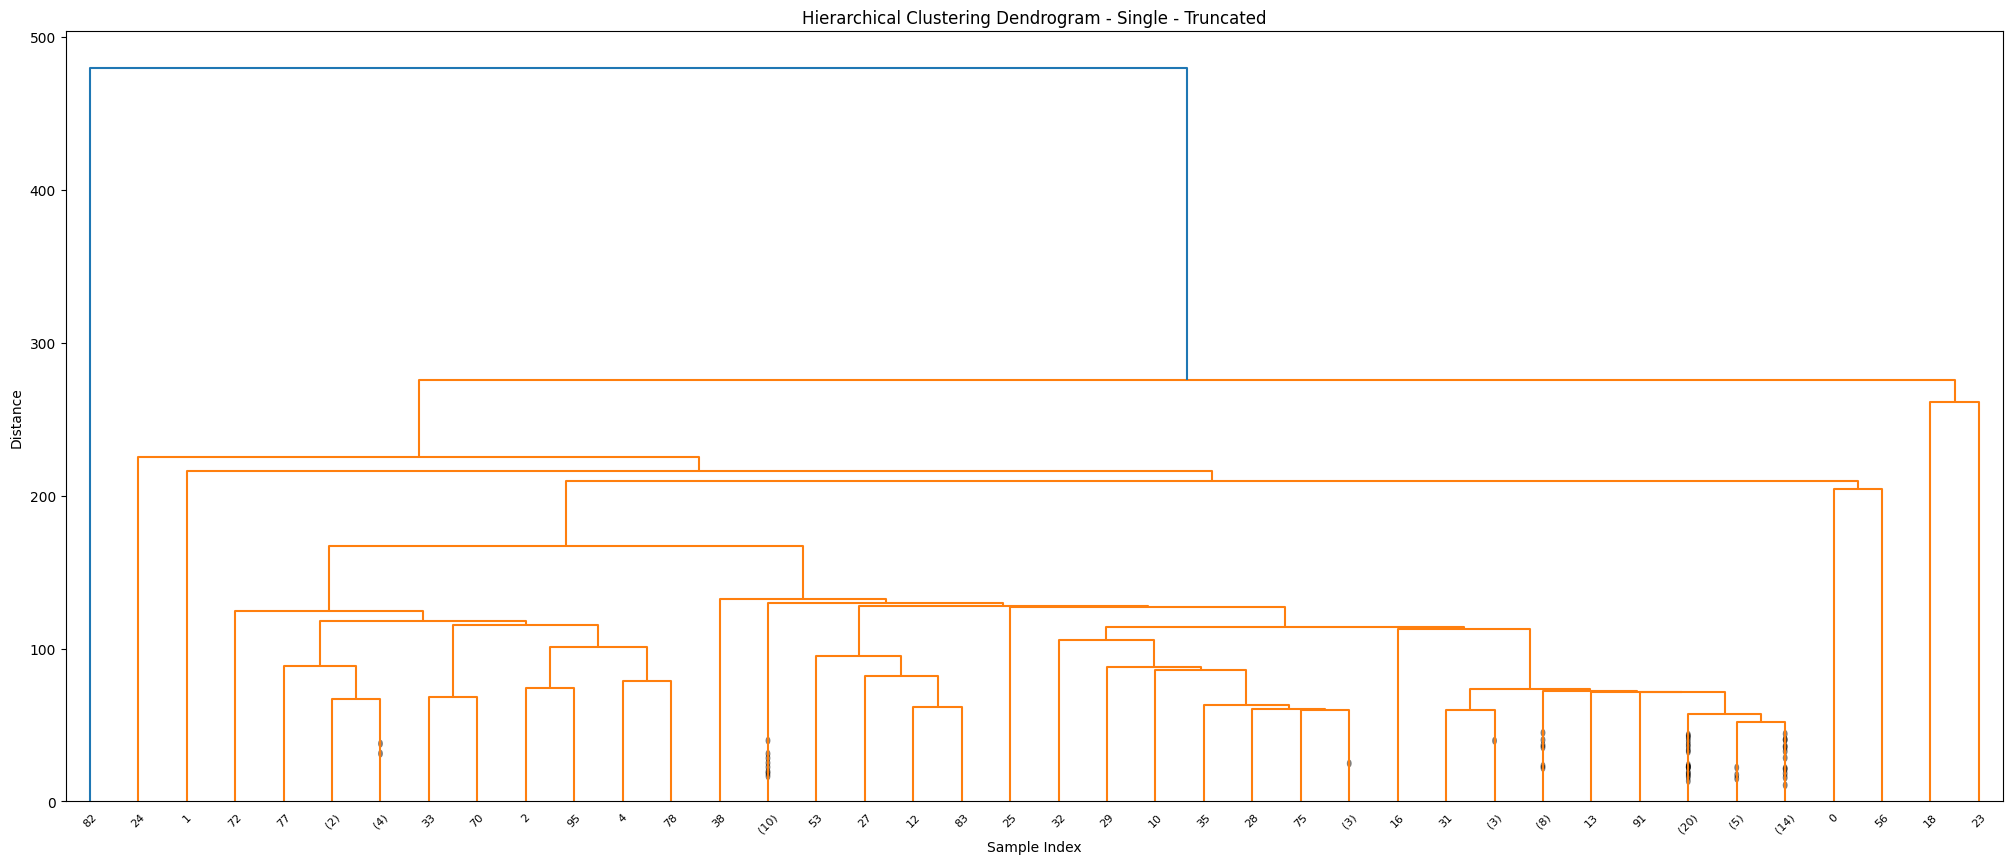

In [15]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Single - Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z, leaf_font_size=8., truncate_mode='lastp', p=40, show_contracted=True)

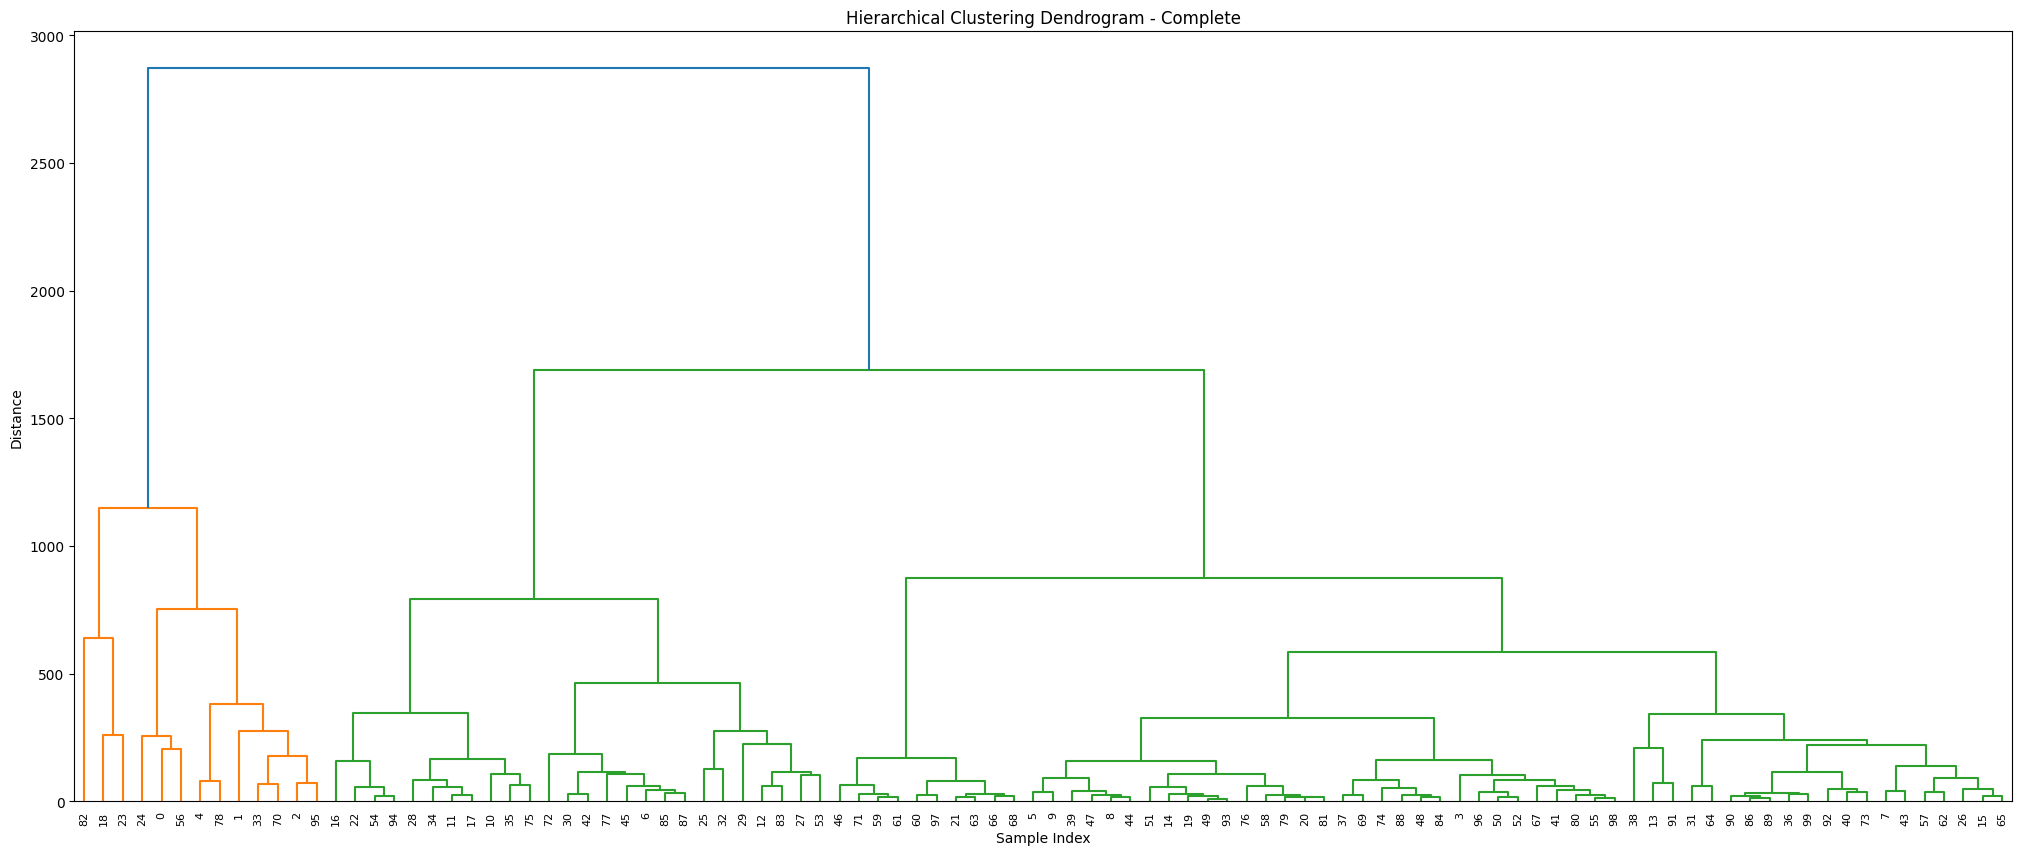

In [16]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Complete')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, leaf_font_size=8.)

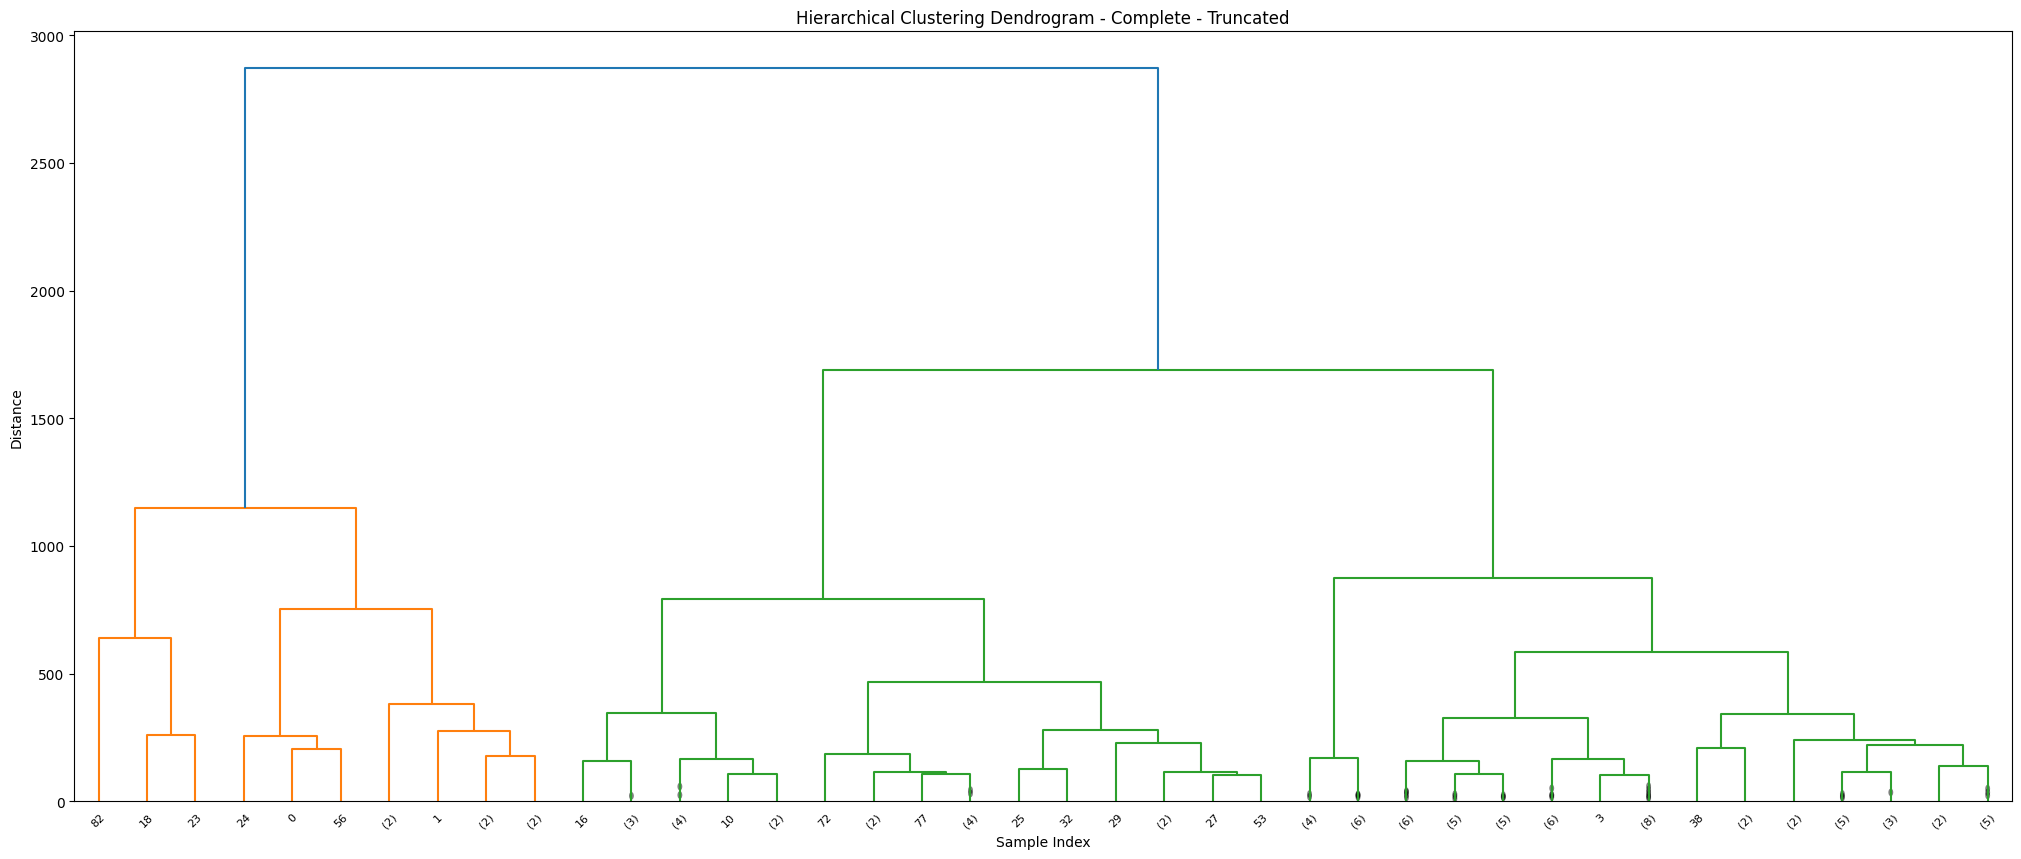

In [17]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Complete - Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, leaf_font_size=8., truncate_mode='lastp', p=40, show_contracted=True)

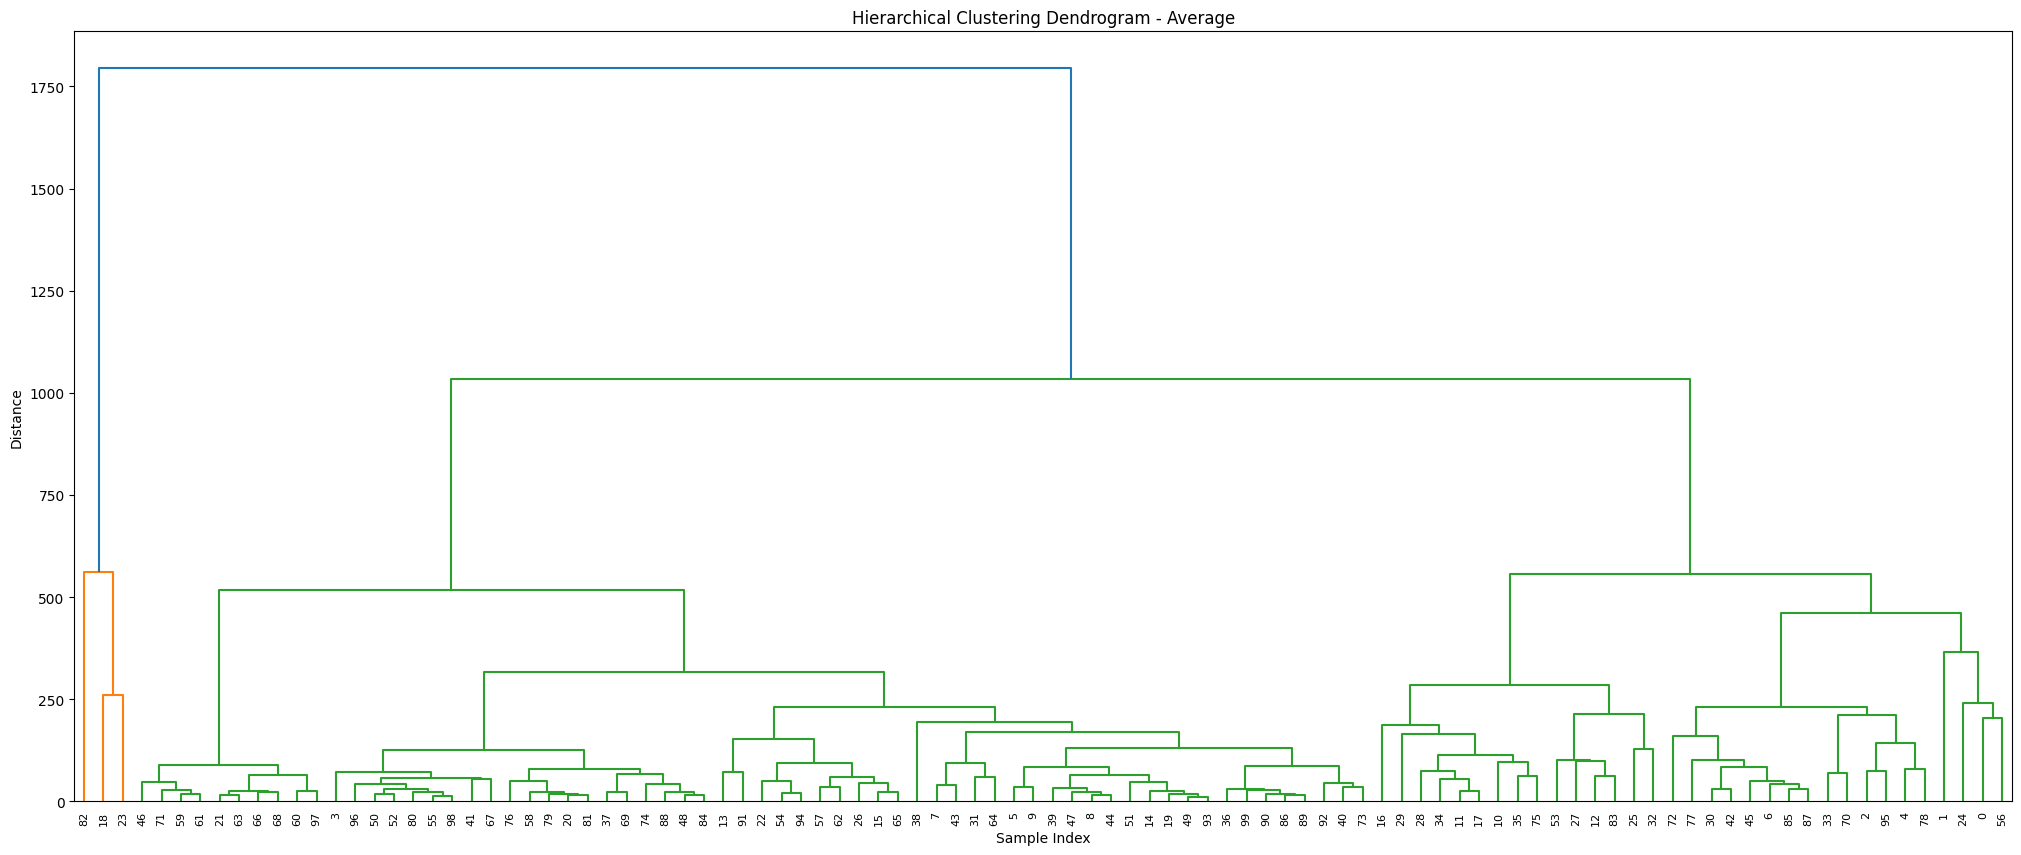

In [18]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Average')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z, leaf_font_size=8.)

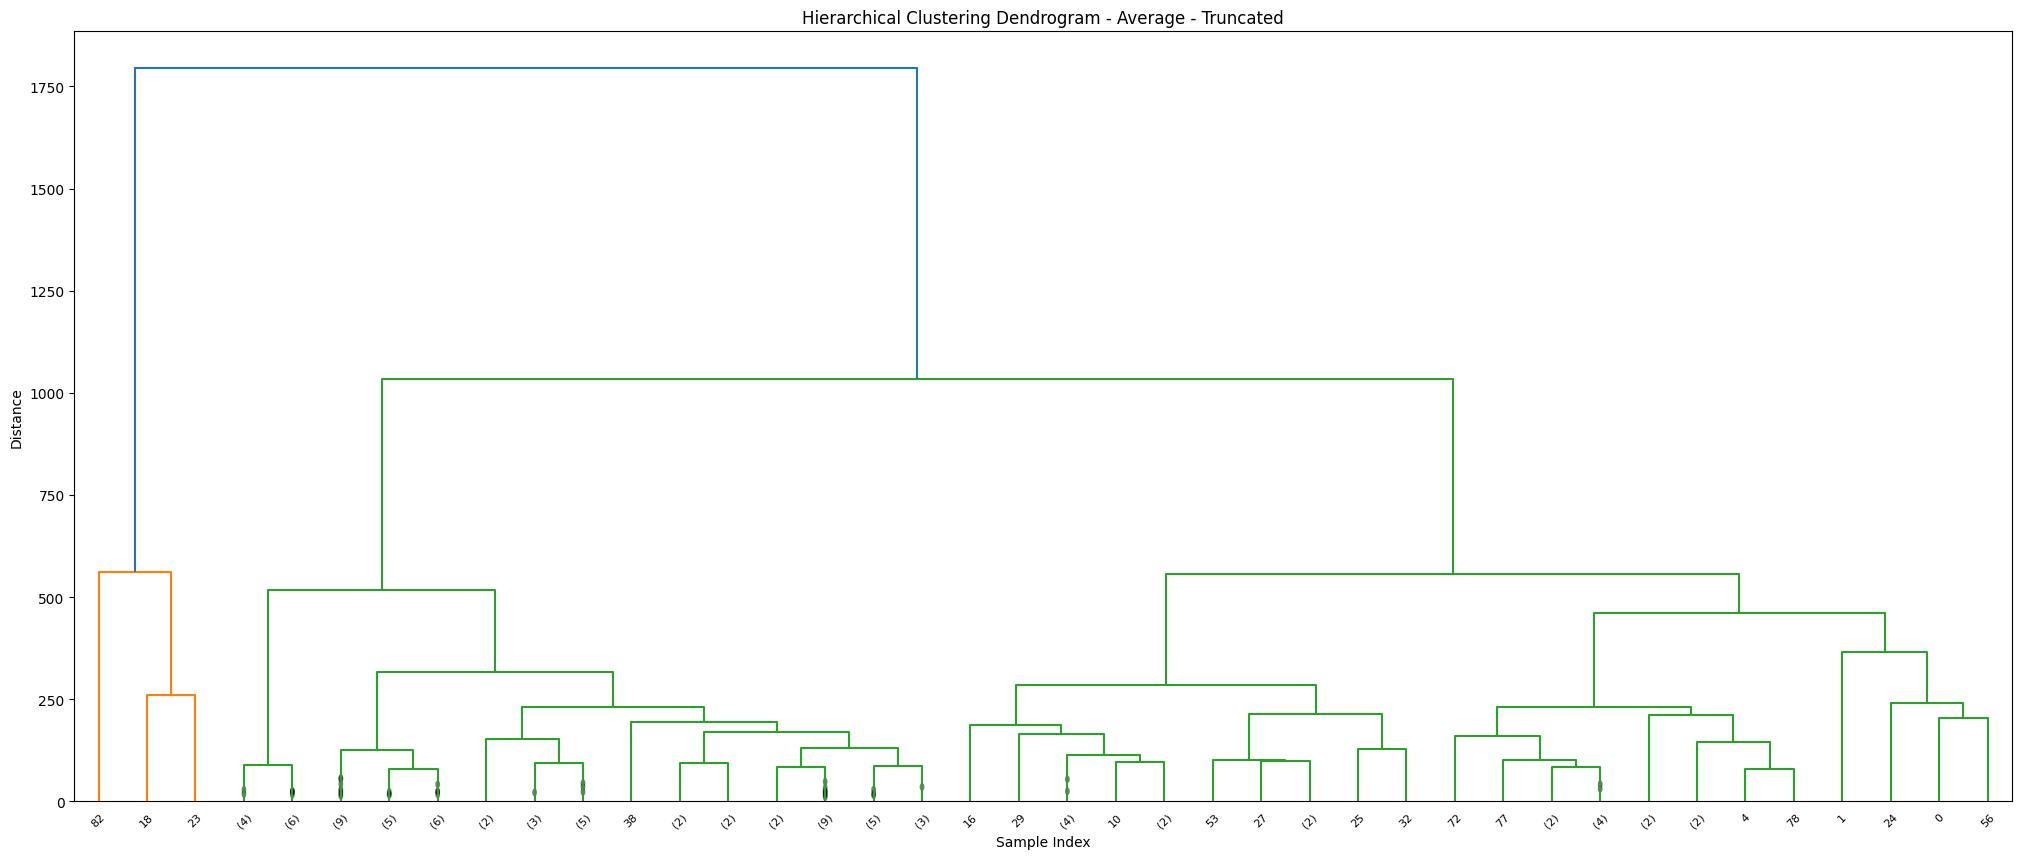

In [19]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram - Average - Truncated')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
Z = hierarchy.linkage(X_sample.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z, leaf_font_size=8., truncate_mode='lastp', p=40, show_contracted=True)